In [1]:
# Standart Libs for AI
import pandas as pd, numpy as np, matplotlib.pyplot as plt
import re

# This libraries below will be used for NLP
from textblob import TextBlob
import nltk
from textblob.classifiers import NaiveBayesClassifier

In [2]:
# Creating Data Frame
train_set = pd.read_csv('./input/train.csv.zip',encoding='latin-1')

In [3]:
train_set.head(10)

,ItemID,Sentiment,SentimentText
0,1,0,is so sad for my APL frie...
1,2,0,I missed the New Moon trail...
2,3,1,omg its already 7:30 :O
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,i think mi bf is cheating on me!!! ...
5,6,0,or i just worry too much?
6,7,1,Juuuuuuuuuuuuuuuuussssst Chillin!!
7,8,0,Sunny Again Work Tomorrow :-| ...
8,9,1,handed in my uniform today . i miss you ...
9,10,1,hmmmm.... i wonder how she my number @-)


In [4]:
# Cleaning text 
def cleanText(text):
    text = re.sub('#[A-Za-z0-9]+', '', text) # removes any string with a '#'
    text = re.sub('@[A-Za-z0-9_]+', '', text) # removes any string with a '#'
    text = re.sub('\\n', '', text) # removes the '\n' string
    text = re.sub('https:\/\/\S+', '', text) # removes any hyperlinks
    return text

In [5]:
train_set['CleanedText'] = train_set['SentimentText'].apply(cleanText)
train_set

,ItemID,Sentiment,SentimentText,CleanedText
0,1,0,is so sad for my APL frie...,is so sad for my APL frie...
1,2,0,I missed the New Moon trail...,I missed the New Moon trail...
2,3,1,omg its already 7:30 :O,omg its already 7:30 :O
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,i think mi bf is cheating on me!!! ...,i think mi bf is cheating on me!!! ...
...,...,...,...,...
99984,99996,0,@Cupcake seems like a repeating problem hop...,seems like a repeating problem hope you're...
99985,99997,1,@cupcake__ arrrr we both replied to each other...,arrrr we both replied to each other over diff...
99986,99998,0,@CuPcAkE_2120 ya i thought so,ya i thought so
99987,99999,1,@Cupcake_Dollie Yes. Yes. I'm glad you had mor...,Yes. Yes. I'm glad you had more fun with me.


In [6]:
# Modifiying DF
train_set = train_set.drop(['ItemID', 'SentimentText'], axis=1)
train_set=train_set.reindex(columns=['CleanedText', 'Sentiment'])
train_set.loc[train_set["Sentiment"] == 0, "Sentiment"] = "neg"
train_set.loc[train_set["Sentiment"] == 1, "Sentiment"] = "pos"
train_set

,CleanedText,Sentiment
0,is so sad for my APL frie...,neg
1,I missed the New Moon trail...,neg
2,omg its already 7:30 :O,pos
3,.. Omgaga. Im sooo im gunna CRy. I'...,neg
4,i think mi bf is cheating on me!!! ...,neg
...,...,...
99984,seems like a repeating problem hope you're...,neg
99985,arrrr we both replied to each other over diff...,pos
99986,ya i thought so,neg
99987,Yes. Yes. I'm glad you had more fun with me.,pos


In [7]:
# Dividing DF to train our model
df = train_set.iloc[np.random.choice(np.arange(len(train_set)), 5000, False)]

df


,CleanedText,Sentiment
10184,&quot;My Big Redneck Wedding&quot; is killing ...,neg
99947,how come I was the last one you listed on the...,neg
11966,$400 to fix my car... trying to figure out whe...,neg
64003,ha! Don't worry I'm marrying one next year. G...,pos
85226,what do I do to bring it down? Its still 102!,neg
...,...,...
43621,1525.: i already didi try anything... you ca...,neg
97911,missed you at graduation drove all that way...,neg
21225,Good way to ruin your perfect body baby. I l...,neg
5630,my truck is dead. he lives no more.,neg


In [8]:
# Train data as input list
train = list()
for index, row in df.iterrows():
    train.append((row['CleanedText'], row['Sentiment']))

In [9]:
# Training AI to learn Sentiments
cl = NaiveBayesClassifier(train)

In [10]:
# Little test for trained data with complex keywords
prob_dist = cl.prob_classify("Why in this good wheater i have ugly face")
prob_dist.max()

'neg'

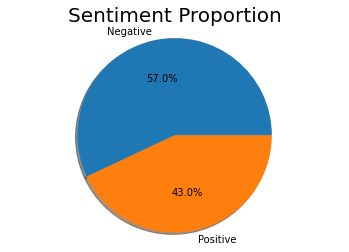

In [11]:
# Showing Data Distrubutin 0 as Negative, 1 as Positive
labels = ['Negative', 'Positive']
sizes = [df['Sentiment'].value_counts()[0],
         df['Sentiment'].value_counts()[1]
        ]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.title('Sentiment Proportion', fontsize=20)
plt.show()

In [12]:
# Test Data and configuration
test_df = train_set.iloc[np.random.choice(np.arange(len(train_set)), 300, False)]

test_df

,CleanedText,Sentiment
35092,"Animation?! Slow down man, and let the rest c...",pos
43815,i couldnt move this morning. i was in so much...,neg
73787,its a great park harriman is nice too,pos
56998,Ah isn't it just a nightmare!!I've so much to...,neg
56002,notorious? awesome! thanks,pos
...,...,...
48144,its quite decent... On it right now... Good s...,pos
35703,You're doing a great job!,pos
20309,@ the diner with my mommy! hit me up..,pos
65069,woke up to my chest burning so bad I can't br...,neg


In [13]:
# Test data as input list
tests = list()
for index, row in test_df.iterrows():
    tests.append((row['CleanedText'], row['Sentiment']))

In [14]:
# To see how well our predictions are
cl.accuracy(tests)

0.7066666666666667

In [15]:
# Keyword's ratio on sentiment
cl.show_informative_features(10)

Most Informative Features
           contains(sad) = True              neg : pos    =     27.8 : 1.0
          contains(sick) = True              neg : pos    =     20.7 : 1.0
      contains(happened) = True              neg : pos    =     13.7 : 1.0
       contains(welcome) = True              pos : neg    =     12.8 : 1.0
         contains(sucks) = True              neg : pos    =      9.6 : 1.0
          contains(died) = True              neg : pos    =      9.3 : 1.0
       contains(forward) = True              pos : neg    =      8.8 : 1.0
           contains(omg) = True              neg : pos    =      8.7 : 1.0
         contains(thank) = True              pos : neg    =      8.7 : 1.0
       contains(amazing) = True              pos : neg    =      7.7 : 1.0
